<a href="https://colab.research.google.com/github/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/blob/main/Trabalho_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression


In [188]:
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2021_Parte1_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2021_Parte2_03jun2022.csv
!wget https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2022_Parte1_03jun2022.csv

--2022-07-17 22:08:36--  https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62493275 (60M) [text/plain]
Saving to: ‘HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv.7’

HIST_PAINEL_COVIDBR 100%[===================>]  59.60M  45.4MB/s    in 1.3s    

2022-07-17 22:08:37 (45.4 MB/s) - ‘HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv.7’ saved [62493275/62493275]

--2022-07-17 22:08:38--  https://raw.githubusercontent.com/GabriellMiranda/TP-Dados-Analise-de-dados-de-covid/main/HIST_PAINEL_COVIDBR_03jun2022/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv
Resolving raw.githubusercontent.com (raw.githubuserconte

In [189]:
covid2020P1 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2020_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2020P2 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2020_Parte2_03jun2022.csv",error_bad_lines=False,sep=";")
covid2021P1 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2021_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2021P2 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2021_Parte2_03jun2022.csv",error_bad_lines=False,sep=";")
covid2022 = pd.read_csv("/content/HIST_PAINEL_COVIDBR_2022_Parte1_03jun2022.csv",error_bad_lines=False,sep=";")
covid2020 = pd.concat([covid2020P1,covid2020P2])
covid2021 = pd.concat([covid2021P1,covid2021P2])



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


# Análise exploratória

## Demonstração dos nomes das colunas dos dataframes

In [190]:
covid2020.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

#Informações do dataframe

In [191]:
covid2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1574188 entries, 0 to 859706
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1574188 non-null  object 
 1   estado                  1573877 non-null  object 
 2   municipio               1559600 non-null  object 
 3   coduf                   1574188 non-null  int64  
 4   codmun                  1565480 non-null  float64
 5   codRegiaoSaude          1559600 non-null  float64
 6   nomeRegiaoSaude         1559600 non-null  object 
 7   data                    1574188 non-null  object 
 8   semanaEpi               1574188 non-null  int64  
 9   populacaoTCU2019        1568308 non-null  float64
 10  casosAcumulado          1574188 non-null  int64  
 11  casosNovos              1574188 non-null  int64  
 12  obitosAcumulado         1574188 non-null  int64  
 13  obitosNovos             1574188 non-null  int64  
 14  Rec

# Tipos de dados do dataframe

In [192]:
covid2020.dtypes

regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado              int64
casosNovos                  int64
obitosAcumulado             int64
obitosNovos                 int64
Recuperadosnovos          float64
emAcompanhamentoNovos     float64
interior/metropolitana    float64
dtype: object

# Primeiras 10 linhas do dataframe
É possível perceber que existem muitos valores nulos em alguns colunas, isto por que além dos dados de cada região do
Brásil, também temos dados de todo o Brasil, dessa forma iremos dividir o dataframe, um que terá muitos valores nulos, mas monstrando
os dados do país todo, e outro com dados de regiões do Brasil.

In [193]:
covid2020.head(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,1.0,1.0,NaN
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-01,10,210147125.0,2,0,0,0,1.0,1.0,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-02,10,210147125.0,2,0,0,0,0.0,2.0,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-03,10,210147125.0,2,0,0,0,0.0,2.0,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-04,10,210147125.0,3,1,0,0,1.0,2.0,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-05,10,210147125.0,7,4,0,0,4.0,3.0,NaN


Aqui é possível perceber que o Brasil se encontra na coluna região

In [194]:
covid2020['regiao'].unique()

array(['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

# Limpeza dos Dados

## Realizando a limpeza dos dados referente ao Brasil

Quando a região é Brasil, temos que os dados referentes a essa linha se refere ao Brasil inteiro.

In [195]:
DadosBrasil2020 = covid2020[covid2020['regiao'] == 'Brasil']
DadosBrasil2021 = covid2021[covid2021['regiao'] == "Brasil"]
DadosBrasil2022 = covid2022[covid2022['regiao'] == 'Brasil']

In [196]:
#mudando a coluna do nome região para pais, já que só teremos os dados do Brasil
DadosBrasil2020.rename(columns = {'regiao':'pais'}, inplace = True)
DadosBrasil2021.rename(columns = {'regiao':'pais'}, inplace = True)
DadosBrasil2022.rename(columns = {'regiao':'pais'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [197]:
DadosBrasil2022

,pais,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0,NaN
150,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0,NaN
151,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0,NaN
152,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0,NaN


Agora iremos eliminar as colunas que tem valores nulos dos dataframes do Brasil

In [198]:
for i in ["estado","municipio","codmun","codRegiaoSaude","nomeRegiaoSaude","interior/metropolitana"]:
  DadosBrasil2020 = DadosBrasil2020.drop(columns=[i])
  DadosBrasil2021 = DadosBrasil2021.drop(columns=[i])
  DadosBrasil2022 = DadosBrasil2022.drop(columns=[i])

In [199]:
DadosBrasil2022

,pais,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,76,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0
1,Brasil,76,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0
2,Brasil,76,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0
3,Brasil,76,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0
4,Brasil,76,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0
...,...,...,...,...,...,...,...,...,...,...,...
149,Brasil,76,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0
150,Brasil,76,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0
151,Brasil,76,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0
152,Brasil,76,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0


Nos dataframes do Brasil é possível perceber que a coluna 'coduf' não é nula, mas retorna o mesmo valor, valor esse que não serão utilizados nesta análise

In [200]:
print(DadosBrasil2020['coduf'],DadosBrasil2021['coduf'], DadosBrasil2022['coduf'])


0      76
1      76
2      76
3      76
4      76
       ..
148    76
149    76
150    76
151    76
152    76
Name: coduf, Length: 311, dtype: int64 0      76
1      76
2      76
3      76
4      76
       ..
179    76
180    76
181    76
182    76
183    76
Name: coduf, Length: 365, dtype: int64 0      76
1      76
2      76
3      76
4      76
       ..
149    76
150    76
151    76
152    76
153    76
Name: coduf, Length: 154, dtype: int64


Então a coluna 'coduf' será removida dos dataframes

In [201]:
DadosBrasil2020 = DadosBrasil2020.drop(columns=['coduf'])
DadosBrasil2021 = DadosBrasil2021.drop(columns=['coduf'])
DadosBrasil2022 = DadosBrasil2022.drop(columns=['coduf'])

# Resultado obtido a partir da limpeza dos dados (Brasil)

In [202]:
DadosBrasil2022

,pais,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0
1,Brasil,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0
2,Brasil,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0
3,Brasil,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0
4,Brasil,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0
...,...,...,...,...,...,...,...,...,...,...
149,Brasil,2022-05-30,22,210147125.0,30977661.0,24082,666516,63,29971308.0,339837.0
150,Brasil,2022-05-31,22,210147125.0,31019038.0,41377,666676,160,30011391.0,340971.0
151,Brasil,2022-06-01,22,210147125.0,31060017.0,40979,666801,125,30038200.0,355016.0
152,Brasil,2022-06-02,22,210147125.0,31101290.0,41273,666928,127,30054599.0,379763.0


# Selecionando os dados das regiões do Brasil nos anos de 2020, 2021 e 2022.

In [203]:
RegioesBrasil2020 = covid2020[covid2020['regiao'] != 'Brasil']
RegioesBrasil2021 = covid2021[covid2021['regiao'] != 'Brasil']
RegioesBrasil2022 = covid2022[covid2022['regiao'] != 'Brasil']


In [204]:
RegioesBrasil2020.head(3)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
158,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN,NaN,NaN
159,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN,NaN,NaN
160,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN,NaN,NaN


In [205]:
def transf(valor):
  if valor < 0:
    return 0
  else:
    return valor

In [206]:
RegioesBrasil2020['casosNovos'] = RegioesBrasil2020['casosNovos'].apply(lambda x: transf(x))
RegioesBrasil2020['obitosNovos'] = RegioesBrasil2020['obitosNovos'].apply(lambda x: transf(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Regiões do Brasil em 2020

In [207]:
RegioesBrasil2020

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
158,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN,NaN,NaN
159,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN,NaN,NaN
160,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN,NaN,NaN
161,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN,NaN,NaN
162,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859702,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,NaN,NaN,1.0
859703,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,NaN,NaN,1.0
859704,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-29,53,3015268.0,250457,721,4241,18,NaN,NaN,1.0
859705,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-30,53,3015268.0,251135,678,4248,7,NaN,NaN,1.0


# Regiões do Brasil em 2021

In [208]:
RegioesBrasil2021

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
181,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-01,53,1777225.0,95999.0,270,1822,5,NaN,NaN,NaN
182,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-02,53,1777225.0,96433.0,434,1825,3,NaN,NaN,NaN
183,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-03,1,1777225.0,96906.0,473,1832,7,NaN,NaN,NaN
184,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-04,1,1777225.0,97197.0,291,1840,8,NaN,NaN,NaN
185,Norte,RO,NaN,11,NaN,NaN,NaN,2021-01-05,1,1777225.0,97854.0,657,1852,12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033891,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-27,52,3015268.0,519103.0,225,11100,5,NaN,NaN,1.0
1033892,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-28,52,3015268.0,519196.0,93,11104,4,NaN,NaN,1.0
1033893,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-29,52,3015268.0,519346.0,150,11105,1,NaN,NaN,1.0
1033894,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-30,52,3015268.0,519546.0,200,11107,2,NaN,NaN,1.0


# Regiões do Brasil em 2022

In [209]:
RegioesBrasil2022

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
154,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-01,52,1777225.0,284660.0,34,6737,3,NaN,NaN,NaN
155,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-02,1,1777225.0,284692.0,32,6739,2,NaN,NaN,NaN
156,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-03,1,1777225.0,284783.0,91,6742,3,NaN,NaN,NaN
157,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-04,1,1777225.0,285037.0,254,6745,3,NaN,NaN,NaN
158,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-05,1,1777225.0,285269.0,232,6748,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865321,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-30,22,3015268.0,708552.0,2604,11691,1,NaN,NaN,1.0
865322,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-31,22,3015268.0,710694.0,2142,11691,0,NaN,NaN,1.0
865323,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-01,22,3015268.0,712968.0,2274,11692,1,NaN,NaN,1.0
865324,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-02,22,3015268.0,715938.0,2970,11692,0,NaN,NaN,1.0


# Contagem dos pacientes recuperados da COVID-19

In [210]:
#Verificando se existem algum valor não nulo na coluna recuperadosnovos dos dataframes de regiões
value1 = RegioesBrasil2022['Recuperadosnovos'].count()
value2 = RegioesBrasil2021['Recuperadosnovos'].count()
value3 = RegioesBrasil2020['Recuperadosnovos'].count()
print("RecuperadosNovaos:",value1, value2, value3)

value1 = RegioesBrasil2022['emAcompanhamentoNovos'].count()
value2 = RegioesBrasil2021['emAcompanhamentoNovos'].count()
value3 = RegioesBrasil2020['emAcompanhamentoNovos'].count()
print("emAcompanhamentoNovos:",value1, value2, value3)


RecuperadosNovaos: 0 0 0
emAcompanhamentoNovos: 0 0 0


Apagando as colunas nulas dos dataframes de regiões

In [211]:
#Colunas nulas deletadas
for i in ['Recuperadosnovos','emAcompanhamentoNovos']:

  RegioesBrasil2022 = RegioesBrasil2022.drop(columns=[i])
  RegioesBrasil2021 = RegioesBrasil2021.drop(columns=[i])
  RegioesBrasil2020 = RegioesBrasil2020.drop(columns=[i])


In [212]:
RegioesBrasil2020

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
158,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-25,9,1777225.0,0,0,0,0,NaN
159,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-26,9,1777225.0,0,0,0,0,NaN
160,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-27,9,1777225.0,0,0,0,0,NaN
161,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-28,9,1777225.0,0,0,0,0,NaN
162,Norte,RO,NaN,11,NaN,NaN,NaN,2020-02-29,9,1777225.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859702,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-27,53,3015268.0,248543,615,4201,3,1.0
859703,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-28,53,3015268.0,249736,1193,4223,22,1.0
859704,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-29,53,3015268.0,250457,721,4241,18,1.0
859705,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-12-30,53,3015268.0,251135,678,4248,7,1.0


# Visualização de Dados

## Média de casos novos de Covid em cada região do Brasil nos anos de 2020, 2021 e 2022

## Em 2020

MÉDIA DE CASOS NOVOS EM 2020
regiao
Centro-Oeste    13.268112
Nordeste         7.555598
Norte           13.351287
Sudeste         11.489979
Sul              8.125505
Name: casosNovos, dtype: float64


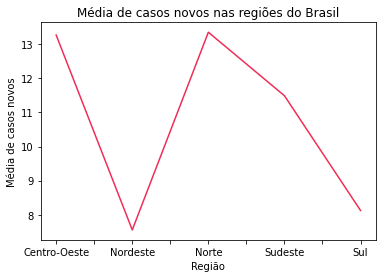

In [213]:
df_covid2020 = RegioesBrasil2020.groupby('regiao')
mediaCasosNovos2020 = df_covid2020['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2020")
print(mediaCasosNovos2020)
print("="*30)

df_covid2020.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()


## Em 2021

MÉDIA DE CASOS NOVOS EM 2021
regiao
Centro-Oeste    17.701237
Nordeste         9.235051
Norte           12.683276
Sudeste         19.533468
Sul             13.687786
Name: casosNovos, dtype: float64


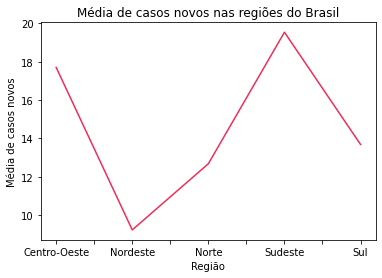

In [214]:
df_covid2021 = RegioesBrasil2021.groupby('regiao')
mediaCasosNovos2021 = df_covid2021['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2021")
print(mediaCasosNovos2021)
print("="*30)

df_covid2021.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()


## Em 2022

MÉDIA DE CASOS NOVOS EM 2022
regiao
Centro-Oeste    26.616238
Nordeste         9.554292
Norte           16.576934
Sudeste         27.620882
Sul             25.993881
Name: casosNovos, dtype: float64


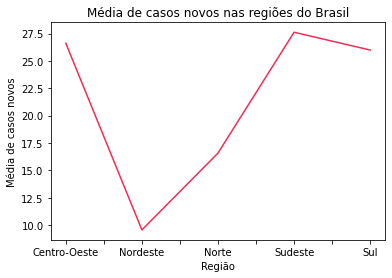

In [215]:
df_covid2022 = RegioesBrasil2022.groupby('regiao')
mediaCasosNovos2022 = df_covid2022['casosNovos'].mean().head(10)
print("MÉDIA DE CASOS NOVOS EM 2022")
print(mediaCasosNovos2022)
print("="*30)

df_covid2022.mean()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Média de casos novos')
plt.title("Média de casos novos nas regiões do Brasil")
plt.show()

## Quantidade de casos novos em cada região nos anos de 2020, 2021 e 2022.




QUANTIDADE DE CASOS NOVOS EM 2020
regiao
Centro-Oeste    1758874
Nordeste        3835516
Norte           1722543
Sudeste         5393442
Sul             2724100
Name: casosNovos, dtype: int64


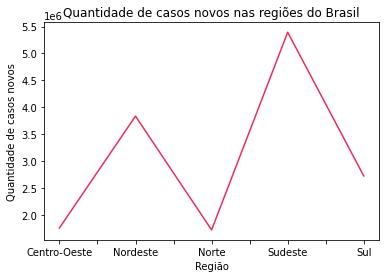

In [216]:
df_covid2020 = RegioesBrasil2020.groupby('regiao')
casosNovos2020 = df_covid2020['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2020")
print(casosNovos2020)
print("="*30)

df_covid2020.sum()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Quantidade de casos novos')
plt.title("Quantidade de casos novos nas regiões do Brasil")
plt.show()

QUANTIDADE DE CASOS NOVOS EM 2021
regiao
Centro-Oeste     3056030
Nordeste         6107878
Norte            2129522
Sudeste         11949404
Sul              5980262
Name: casosNovos, dtype: int64


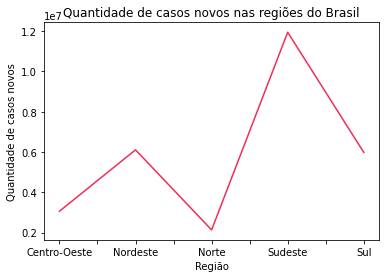

In [217]:
df_covid2021 = RegioesBrasil2021.groupby('regiao')
casosNovos2021 = df_covid2021['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2021")
print(casosNovos2021)
print("="*30)

df_covid2021.sum()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Quantidade de casos novos')
plt.title("Quantidade de casos novos nas regiões do Brasil")
plt.show()


QUANTIDADE DE CASOS NOVOS EM 2022
regiao
Centro-Oeste    1938780
Nordeste        2666106
Norte           1174310
Sudeste         7129060
Sul             4791660
Name: casosNovos, dtype: int64


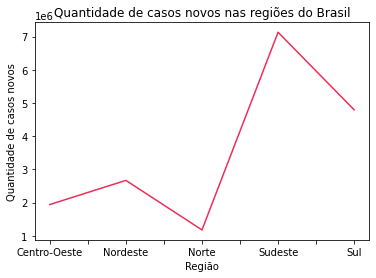

In [218]:
df_covid2022 = RegioesBrasil2022.groupby('regiao')
casosNovos2022 = df_covid2022['casosNovos'].sum().head(10)
print("QUANTIDADE DE CASOS NOVOS EM 2022")
print(casosNovos2022)
print("="*30)

df_covid2022.sum()['casosNovos'].plot(c='#EF2D56')
plt.xlabel('Região')
plt.ylabel('Quantidade de casos novos')
plt.title("Quantidade de casos novos nas regiões do Brasil")
plt.show()

###Concatenação dos bancos de dados dos anos 2020,2021,2022 para a visualização mais abrangente acerca dos casos novos no decorrer dos anos

In [219]:
# Variáveis a serem usadas
# DadosBrasil2020 -> 21, 22
# RegioesBrasil2020 -> 21, 22

RegioesBrasilFull = pd.concat([RegioesBrasil2020,RegioesBrasil2021,RegioesBrasil2022])

In [220]:
RegioesBrasilFull['regiao'].unique()

array(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

In [221]:
# Definição de algumas cores para graficos
regioes_colors = {
    'Norte': '#FAA916',
    'Nordeste': '#0FA3B1',
    'Sudeste': '#BB4430',
    'Sul': '#FFCBDB',
    'Centro-Oeste': '#7D5B8C'
}

##Gráfico que mostra o número de casos novos no decorrer dos anos

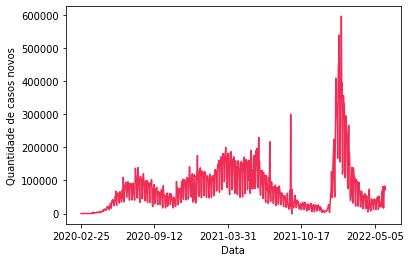

In [222]:
group_date = RegioesBrasilFull.groupby("data")
group_date.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('Quantidade de casos novos')
plt.xlabel('Data')
plt.show()

##Visualizando a população dos estados para tentar ver alguma correação

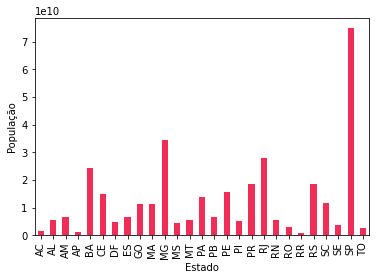

In [223]:
GroupState = RegioesBrasilFull.groupby('estado')
GroupState.sum()['populacaoTCU2019'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('População')
plt.show()

##Criando uma nova coluna para mostrar a proporção entre o número de casos novos e o tamanho da população para cada estado

In [224]:
df = RegioesBrasilFull
df['Prop'] = df['casosNovos'] / df['populacaoTCU2019']

## Gráfico que mostra a relação entre o número de casos novos e a população do estado

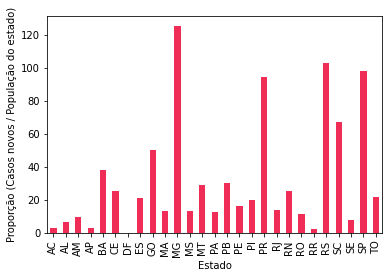

In [225]:
GroupState = df.groupby('estado')
GroupState.sum()['Prop'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('Proporção (Casos novos / População do estado)')
plt.show()

## O gráfico acima revela como ocorre reíncidencia ou aparecimento de novos casos de covid19 em cada estado de acordo com sua população durante os anos de 2020,2021 e 2022

## Gráfico para visualização da relação feita anteriormente para cada ano separadamente

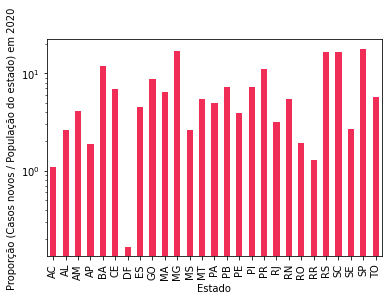

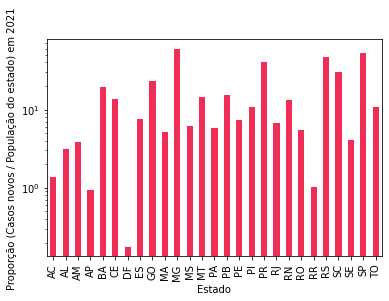

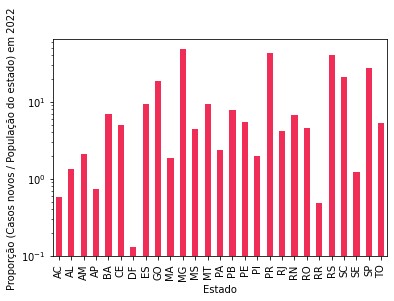

In [226]:
df1 = RegioesBrasil2020
df2 = RegioesBrasil2021
df3 = RegioesBrasil2022

df1['Prop'] = df1['casosNovos'] / df1['populacaoTCU2019']
df2['Prop'] = df2['casosNovos'] / df2['populacaoTCU2019']
df3['Prop'] = df3['casosNovos'] / df3['populacaoTCU2019']


GroupState1 = df1.groupby('estado')
GroupState1.sum()['Prop'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('Proporção (Casos novos / População do estado) em 2020')
plt.yscale('log')
plt.show()

print(end=" ")

GroupState2 = df2.groupby('estado')
GroupState2.sum()['Prop'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('Proporção (Casos novos / População do estado) em 2021')
plt.yscale('log')
plt.show()

print(end=" ")


GroupState3 = df3.groupby('estado')
GroupState3.sum()['Prop'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Estado')
plt.ylabel('Proporção (Casos novos / População do estado) em 2022')
plt.yscale('log')
plt.show()


#Perguntas elaboradas pelo grupo:

#1 - Quais as regiões menos afetadas pela Covid nos anos de 2020, 2021 e 2022 ?

Para descobrir qual região foi mais afetada pelo covid, primeiro plotamos um gráfico para visualizar as regiões que mais tiveram casos novos

Visualizando o gráfico abaixo é possível perceber que as regiões menos afetadas foram as regiões Centro-Oeste, Norte e Sul.

Quantidade de casos novos no dataframe de 2020


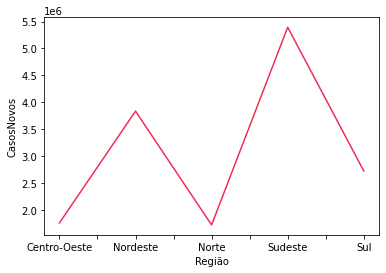

In [227]:
casosNovos2020  = RegioesBrasil2020.groupby('regiao')
casosNovos2020.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2020")
plt.show()

Veja abaixo a quantidade de casos novos em cada região, isto agrupando as regiões e somando a quantidade de casos novos. Nele é ratificado as informações do gráfico, onde demonstra ratificar a confirmação anterior que as regiões Centro-Oeste e Norte são as regiões que menor tiveram casos novos de covid. Veja os dados em ordem crescente abaixo.

In [228]:
casosNovos2020  = RegioesBrasil2020.groupby('regiao')
casosNovos2020['casosNovos'].sum().sort_values()

regiao
Norte           1722543
Centro-Oeste    1758874
Sul             2724100
Nordeste        3835516
Sudeste         5393442
Name: casosNovos, dtype: int64

Veja agora no ano de 2021 quais foram as regiões que mais tiveram novos casos de covid, e com isto foram mais afetadas.

Quantidade de casos novos no dataframe de 2021


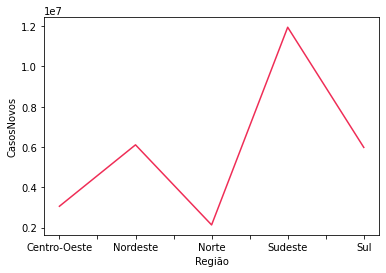

In [229]:
casosNovos2021  = RegioesBrasil2021.groupby('regiao')
casosNovos2021.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2021")
plt.show()

No gráfico e somando os casos novos de covid é possível ver que as regiões menos afetadas nos anos de 2021 foram as regiões do Norte e Centro-Oeste novamente. Veja os dados em ordem crescente abaixo.

In [230]:
casosNovos2021  = RegioesBrasil2021.groupby('regiao')
casosNovos2021['casosNovos'].sum().sort_values()

regiao
Norte            2129522
Centro-Oeste     3056030
Sul              5980262
Nordeste         6107878
Sudeste         11949404
Name: casosNovos, dtype: int64

Agora iremos verificar quais regiões no ano de 2022 foram mais afetadas pelo covid.

Quantidade de casos novos no dataframe de 2022


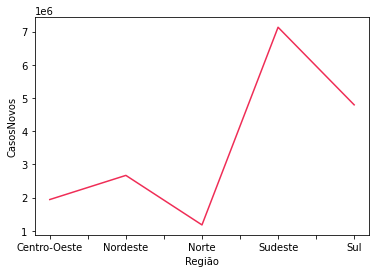

In [231]:
casosNovos2022  = RegioesBrasil2022.groupby('regiao')
casosNovos2022.sum()['casosNovos'].plot(c='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2022")
plt.show()

Novamente o Centro-Oeste e o Norte tiveram meno casos de covid, veja abaixo a soma dos novos casos.

In [232]:
casosNovos2022  = RegioesBrasil2022.groupby('regiao')
casosNovos2022['casosNovos'].sum().sort_values()

regiao
Norte           1174310
Centro-Oeste    1938780
Nordeste        2666106
Sul             4791660
Sudeste         7129060
Name: casosNovos, dtype: int64

Veja agora o dataframe, cujo os dados são a concatenação dos dataframes de 2020, 2021 e 2022. Nele veremos quais regiões foram mais afetadas nos 3 anos. Veja os dados em ordem crescente abaixo.

In [233]:
df = RegioesBrasilFull.groupby('regiao')
df['casosNovos'].sum().sort_values()

regiao
Norte            5026375
Centro-Oeste     6753684
Nordeste        12609500
Sul             13496022
Sudeste         24471906
Name: casosNovos, dtype: int64

#2 - Óbitos de covid durante o ano de 2022?

In [234]:
DadosBrasil2022['obitosNovos'].sum()

47915

#3 - Quais as regiões mais afetadas pela Covid ?

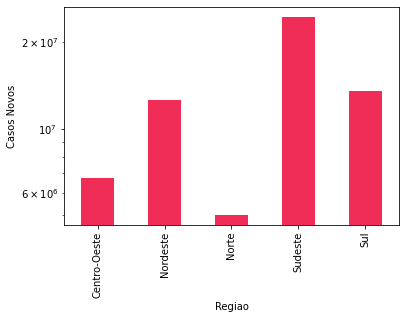

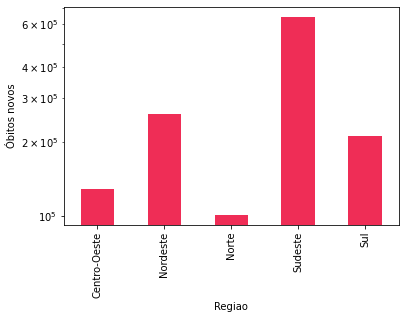

In [235]:
# Pegando o gráfico para analisar os casos novos em cada região
GroupState1 = RegioesBrasilFull.groupby('regiao')
GroupState1.sum()['casosNovos'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Regiao')
plt.ylabel('Casos Novos')
plt.yscale('log')
plt.show()
# Pegando o gráfico para analisar os óbitos novos em cada região
print('\n')
GroupState1 = RegioesBrasilFull.groupby('regiao')
GroupState1.sum()['obitosNovos'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Regiao')
plt.ylabel('Óbitos novos')
plt.yscale('log')
plt.show()

##Por meio desses dois gráficos que analisam os óbitos novos e os casos novos de covid19, podemos observar que as regiões mais afetadas pela covid são as regiões Nordeste,Sudeste e sul respectivamente.

#4 -  Qual o ano mais afetado pela Covid 19 ?

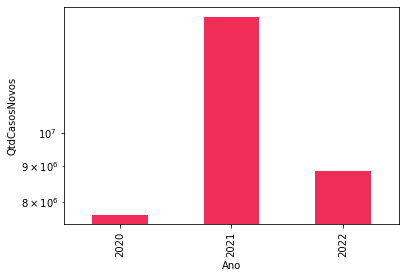

In [236]:
data = pd.DataFrame(columns = ['Ano' , 'QtdCasosNovos'])
data.loc[0] = ['2020',DadosBrasil2020['casosNovos'].sum()]
data.loc[1] = ['2021',DadosBrasil2021['casosNovos'].sum()]
data.loc[2] = ['2022',DadosBrasil2022['casosNovos'].sum()]

GroupState1 = data.groupby('Ano')
GroupState1.sum()['QtdCasosNovos'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Ano')
plt.ylabel('QtdCasosNovos')
plt.yscale('log')
plt.show()

## Por meio desse gráfico, podemos notar que o ano mais afetado com novos casos de covid19 é o ano de 2021 com maior número de aparecimento de novos casos dentre os 3 anos

#5 - Qual a probabilidade de ocorrer um caso em Minas Gerais ?

In [237]:
#Considerando todos os anos e voltando apenas para o estado de Minas Gerais, temos que a probabilidade de ocorrer um caso novo, seja uma relação entre os casos novos e o número de pessoas no estado de minas
# População estimada em Minas Gerais = 21.411.923 no ano de 2021

Minas = RegioesBrasilFull[RegioesBrasilFull['estado'] == 'MG']['casosNovos'].sum()
print(f'A probabilidade é de {(Minas/21411923)*100}%')

A probabilidade é de 32.11344912831977%


#6 - Qual a probabilidade de ocorrer um novo caso de Covid em 2022 ?

In [238]:
#Estimativa da população brasileira em 2022  == 216 577 254

Dados = DadosBrasil2022['casosNovos'].sum()
print(f'A probabilidade é de {(Dados/216577254)*100}%')

A probabilidade é de 4.086282301833968%


#7 - Qual o estado teve o maior número de casos em 2022 ?

In [239]:
RegioesBrasil2022

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana,Prop
154,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-01,52,1777225.0,284660.0,34,6737,3,NaN,0.000019
155,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-02,1,1777225.0,284692.0,32,6739,2,NaN,0.000018
156,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-03,1,1777225.0,284783.0,91,6742,3,NaN,0.000051
157,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-04,1,1777225.0,285037.0,254,6745,3,NaN,0.000143
158,Norte,RO,NaN,11,NaN,NaN,NaN,2022-01-05,1,1777225.0,285269.0,232,6748,3,NaN,0.000131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865321,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-30,22,3015268.0,708552.0,2604,11691,1,1.0,0.000864
865322,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-05-31,22,3015268.0,710694.0,2142,11691,0,1.0,0.000710
865323,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-01,22,3015268.0,712968.0,2274,11692,1,1.0,0.000754
865324,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-02,22,3015268.0,715938.0,2970,11692,0,1.0,0.000985


In [240]:
estadosAgrupados = RegioesBrasil2022.groupby('estado')
estadosOrdenados = estadosAgrupados['casosNovos'].sum().sort_values()
estadosOrdenados

estado
RR      53510
AP      66924
PI      67316
AC      73454
SE      97974
AL     114698
MA     136732
TO     142926
RO     239734
RN     240142
PB     282762
AM     298044
PA     299718
MS     310690
MT     360150
DF     396862
BA     558014
CE     580612
PE     587856
ES     852016
GO     871078
SC    1009636
RJ    1710776
RS    1889352
PR    1892672
SP    2143236
MG    2423032
Name: casosNovos, dtype: int64

Quantidade de casos novos no dataframe de 2022


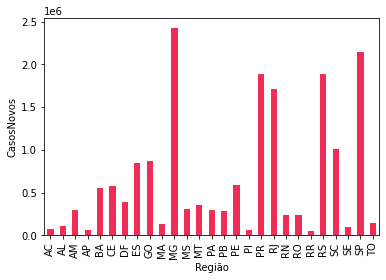

In [241]:
estadosAgrupados = RegioesBrasil2022.groupby('estado')
estadosAgrupados.sum()['casosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2022")
plt.show()

Verificando os dados depois de ordenados, isto em ordem crescente, e verificando o gráfico de barras acima, o estado que teve a maior taxa de covid foi o estado de Minas Gerais.

# 8 - Qual o estado teve o menor número de casos em 2021 ?

Para sabermos qual foi o estado que menor teve casos de covid no anos de 2021, iremos primeiro agrupar o dataframe por estado e ordená-lo verificando qual estado teve menor número de casos em 2021

In [242]:
estadosOrdenados = RegioesBrasil2021.groupby('estado')
estadosOrdenados = estadosOrdenados['casosNovos'].sum().sort_values()
estadosOrdenados

estado
AC      93528
AP     117560
RR     120794
AL     274524
TO     290400
SE     332050
MA     339414
RO     377794
PI     383536
AM     465600
MS     493288
DF     536220
RN     538238
PB     595702
PA     663846
MT     748850
ES     763278
PE     847030
CE    1242468
GO    1277672
SC    1501904
BA    1554916
RJ    1836352
RS    2114886
PR    2363472
MG    3362152
SP    5987622
Name: casosNovos, dtype: int64

Acima é possível ver em ordem crescente que o estado que teve o menor número de casos em 2021 foi o estado do Acré, agora plotaremos um gráfico de barras para ver esta diferença com os outros estados. Veja abaixo:

Quantidade de casos novos no dataframe de 2021


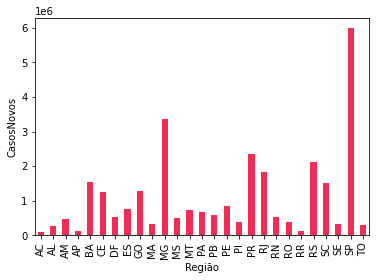

In [243]:
estadosAgrupados = RegioesBrasil2021.groupby('estado')
estadosAgrupados.sum()['casosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2021")
plt.show()

#9 - Qual a região teve mais sucesso no combate ao Covid, nos anos de 2020, 2021 2 2022 ?

Para desconbrir qual região teve mais sucesso ao combate ao covid primeiro vamos verficar quais regiões menos tiveram casos de covid, e verificar as regiões que tiveram menos morte.

In [244]:
#Agrupando as regiões e verificando quais delas tiveram menos casos, vamos usar o dataframe que contenham todos os dados de 2020, 2021 e 2022
regioesOrdenadas = RegioesBrasilFull.groupby('regiao')
regioesOrdenadas['casosNovos'].sum().sort_values()

regiao
Norte            5026375
Centro-Oeste     6753684
Nordeste        12609500
Sul             13496022
Sudeste         24471906
Name: casosNovos, dtype: int64

Nos anos de 2020 a 2022 a região norte teve menos casos novos de covid, ou seja, foi a região que menos teve casos. Veja no gráfico abaixo esta descrepância:

Quantidade de casos novos no dataframe de 2021


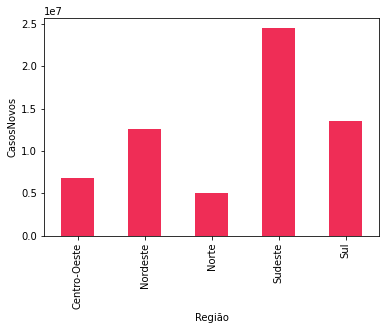

In [245]:
regioesOrdenadas.sum()['casosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('CasosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2021")
plt.show()


Logo, é possível afirmar apenas vendo o gráfico de barras que a região norte foi a menos afetada.

Agora iremos verificar qual região teve menos casos de óbitos

In [246]:
regioesOrdenadas['obitosNovos'].sum().sort_values()

regiao
Norte           101142
Centro-Oeste    128498
Sul             209988
Nordeste        260176
Sudeste         640859
Name: obitosNovos, dtype: int64

A região que menos teve casos de óbitos foi o Norte. Veja no gráfico abaixo esta descrepância com os outros estados.

Quantidade de casos novos no dataframe de 2021


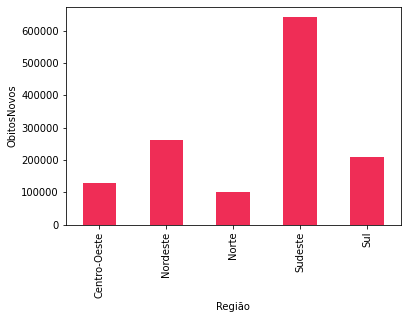

In [247]:
regioesOrdenadas.sum()['obitosNovos'].plot(kind='bar', color='#EF2D56')
plt.ylabel('ObitosNovos')
plt.xlabel('Região')
print("Quantidade de casos novos no dataframe de 2021")
plt.show()


Diante disso, analisando os anos de 2020, 2021 e 2022 a região que conteve mais o covid foi o Norte, pois foi o estado com menos casos e menas morte.

#10 - Qual a região que teve mais óbitos com a Covid ?

A região que teve mais óbito de covid foi a região Sudeste. Veja no gráfico abaixo:

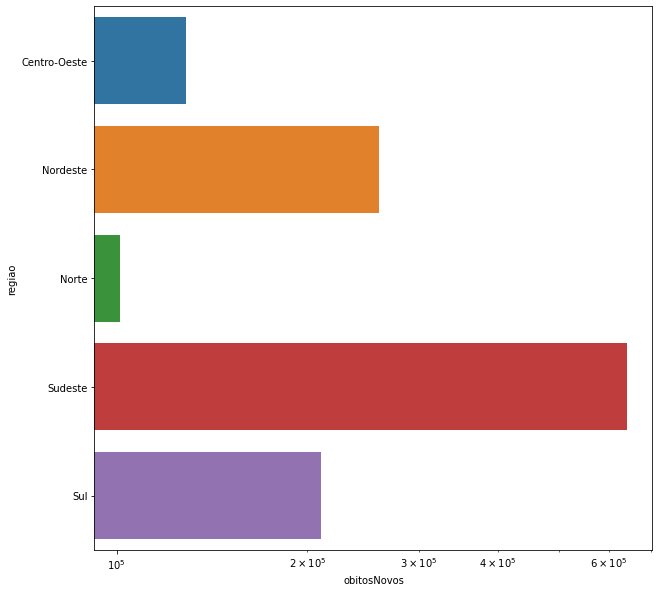

In [248]:
country_group_sum = RegioesBrasilFull.groupby('regiao').sum().reset_index()
plt.figure(figsize=(10,10))

g=sns.barplot(data=country_group_sum, y='regiao', x='obitosNovos', orient='h')
g.set_xscale('log')

plt.show()

# 16) Analise os óbitos diários por covid nos anos de 2020, 2021 e 2022.
Para fazer uma análise dos óbitos diários por covid nos anos de 2020, 2021 e 2022 será utilizado o boxplot.


# Boxplot dos óbitos em 2020

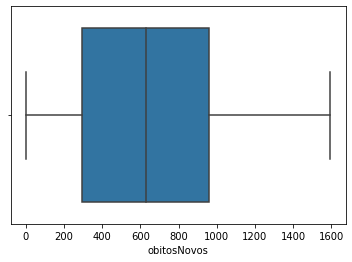

In [249]:
sns.boxplot(x=DadosBrasil2020['obitosNovos']) 
plt.show()

# Boxplot dos óbitos em 2021

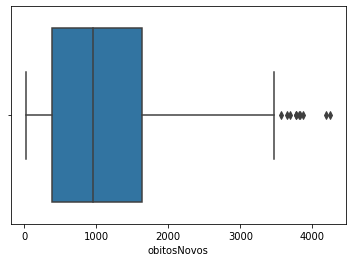

In [250]:
sns.boxplot(x=DadosBrasil2021['obitosNovos']) 
plt.show()

# Boxplot dos óbitos em 2022

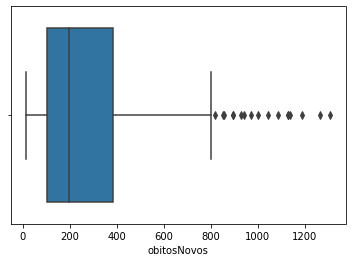

In [251]:
sns.boxplot(x=DadosBrasil2022['obitosNovos']) 
plt.show()

Através dos boxplots criados foi possível perceber que as mortes diárias se elevaram de 2020 para 2021 e diminuíram de 2021 para 2022. Isso ficou perceptível através do maior número de óbito e o 3º quartil de cada ano, sendo que:

*   Em 2020 o maior óbito diário ficou por volta dos 1.600 e o 3º quartil por volta de 970.
*   Em 2021 o maior óbito diário ficou por volta dos 3.500 e o 3º quartil por volta de 1600.
* Em 2020 o maior óbito diário ficou por volta dos 800 e o 3º quartil por volta de 390.

Vale lembrar que foi desconsiderado os outliers na análise realizada.



# 17) Identifique os quartis de cada boxplot gerado na questão 11.

In [252]:
# Ano de 2020
display(np.percentile(DadosBrasil2020['obitosNovos'],25))
display(np.percentile(DadosBrasil2020['obitosNovos'],50))
display(np.percentile(DadosBrasil2020['obitosNovos'],75))
print()
# Ano de 2021
display(np.percentile(DadosBrasil2021['obitosNovos'],25))
display(np.percentile(DadosBrasil2021['obitosNovos'],50))
display(np.percentile(DadosBrasil2021['obitosNovos'],75))
print()
# Ano de 2022
display(np.percentile(DadosBrasil2022['obitosNovos'],25))
display(np.percentile(DadosBrasil2022['obitosNovos'],50))
display(np.percentile(DadosBrasil2022['obitosNovos'],75))

293.0

627.0

957.0

389.0

962.0

1641.0

103.0

195.0

385.0

Quartis de óbitos diários de 2020:
* **1º quartil:** 293
* **2º quartil:** 627
* **3º quartil:** 957

Quartis de óbitos diários de 2021:
* **1º quartil:** 389
* **2º quartil:** 962
* **3º quartil:** 1641

Quartis de óbitos diários de 2022:
* **1º quartil:** 103
* **2º quartil:** 195
* **3º quartil:** 385

Estes dados contribuem na confirmação da afirmação realizada na questão anterior.

# 18 - Os óbitos por covid ocorreram mais em regiões do interior ou em regiões metropolitanas ?
Para responder a esta pergunta será utilizado um gráfico de pizza, onde cidade interior é representada por 0 e cidade metropolitana por 1.

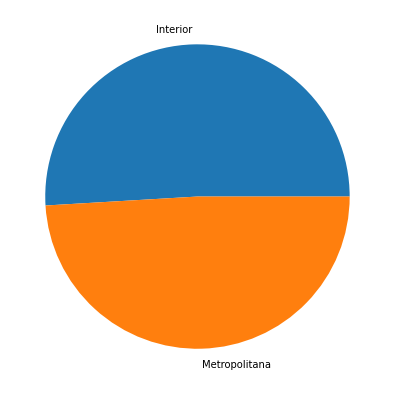

In [253]:
filtro = RegioesBrasilFull.groupby('interior/metropolitana').sum()
filtro.index=filtro.index.astype(str)
filtro.index.values[0]="Interior"
filtro.index.values[1]="Metropolitana"

fig=plt.figure(figsize=(10,7))
plt.pie(labels=filtro.index,x=filtro['obitosNovos'])
plt.show()

Observando o gráfico de pizza acima podemos concluir que os óbitos são maiores em regiões do interior, no entanto, a porcentagem de óbitos para cada tipo de região está bem próxima.

# 19) Como ocorreu os óbitos por covid na região sudeste nos anos de 2020, 2021, 2022?
Para responder a esta pergunta usaremos gráfico de barras para cada ano.

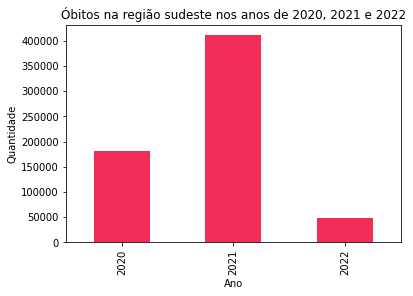

In [254]:
sudeste2020=RegioesBrasil2020.groupby('regiao').sum().reset_index()
sudeste2020=sudeste2020.assign(ano="2020")
sudeste2021=RegioesBrasil2021.groupby('regiao').sum().reset_index()
sudeste2021=sudeste2021.assign(ano="2021")
sudeste2022=RegioesBrasil2022.groupby('regiao').sum().reset_index()
sudeste2022=sudeste2022.assign(ano="2022")

sudeste2020=sudeste2020[sudeste2020['regiao']=="Sudeste"]
sudeste2021=sudeste2021[sudeste2021['regiao']=="Sudeste"]
sudeste2022=sudeste2022[sudeste2022['regiao']=="Sudeste"]

data =pd.concat([sudeste2020,sudeste2021,sudeste2022])
data = data.groupby('ano').sum() 
data['obitosNovos'].plot(kind='bar', color='#EF2D56',title="Óbitos na região sudeste nos anos de 2020, 2021 e 2022",ylabel="Quantidade",xlabel="Ano")
plt.show()

Analisando a resposta da questão 11 poderiamos supor que as demais regiões também teriam um aumento nos óbitos de 2020 para 2021 e uma regressão de 2021 para 2022. Como de fato acontece, basta observar o gráfico de barras acima.

# 20) Identifique como ocorreu os óbitos por covid em cada estado da região sudeste.

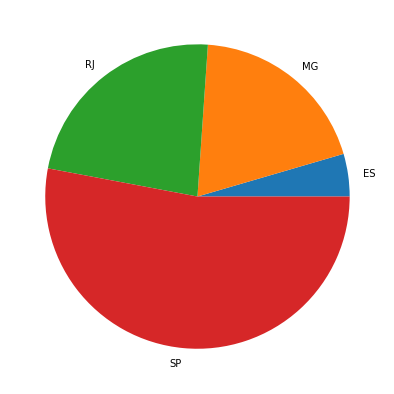

In [255]:
sudeste2020=RegioesBrasil2020[RegioesBrasil2020['regiao']=="Sudeste"]
sudeste2021=RegioesBrasil2021[RegioesBrasil2021['regiao']=="Sudeste"]
sudeste2022=RegioesBrasil2022[RegioesBrasil2022['regiao']=="Sudeste"]
data = pd.concat([sudeste2020,sudeste2021,sudeste2022])
data=data.groupby('estado').sum()
fig=plt.figure(figsize=(10,7))
plt.pie(labels=data.index,x=data['obitosNovos'])
plt.show()

A partir do gráfico de pizza acima podemos perceber que o estado de São Paulo é responsável por mais de 50% dos óbitos por covid da região sudeste. Depois de SP, o Rio de Janeiro possui maior quantidade de mortes, seguido de Minas gerais e Espírito Santo. Além disso, o ES possui uma quantidade muito baixa de óbitos comparado aos outros estados da região sudeste.

# Regressão Linear

**Objetivo:** Extrair correlação entre atributos de dados reais por meio da técnica de regressão linear.

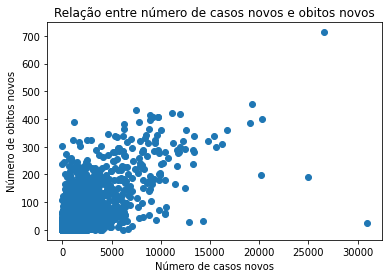

In [256]:
import seaborn as sns
import statsmodels.api as sm

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
plt.scatter(RegioesBrasil2020.casosNovos, RegioesBrasil2020.obitosNovos)
plt.xlabel('Número de casos novos')
plt.ylabel('Número de obitos novos')
plt.title('Relação entre número de casos novos e obitos novos')
plt.show()

# Análise preditiva

Primeiramente iremos analisar as variáveis que possuem correlações fortes para aplicarmos a regressão linear para tentar algum comportamento das variáveis.

In [257]:
RegioesBrasilFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4489619 entries, 158 to 865325
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          float64
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  interior/metropolitana  float64
 15  Prop                    float64
dtypes: float64(6), int64(5), object(5)
memory usage: 582.3+ MB


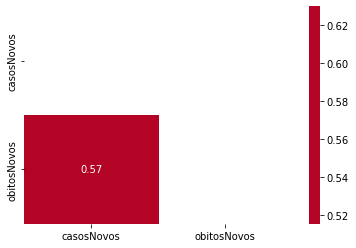

In [258]:
correlation_columns = ['regiao','casosNovos','obitosNovos']
correlation = RegioesBrasilFull[correlation_columns].corr()
matrix = np.triu(RegioesBrasilFull[correlation_columns].corr())
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, center=0, cmap='coolwarm', mask=matrix)

A partir da correlação de Pearson podemos perceber que as variáveis que possuem maior correlação são obitosAcumulado e casosAcumulado, e obitosNovos e casosNovos.

## Modelo de regressão linear utilizando obitosAcumulado e casosAcumulados.


In [259]:
X = RegioesBrasilFull.casosAcumulado
Y = RegioesBrasilFull.obitosAcumulado

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1), Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1), Y))
print('Intercept %.3f ' % lm.intercept_)
# Predição para obitosAcumulado e casosAcumulados.
def calcPredicao1 (casosAcumulados:int,):
  return (casosAcumulados*0.02829546 - 12.322)
print(calcPredicao1(30580512))

Coeficiente estimado:  [0.02829546]
R2 (score):  0.9163298457685978
Intercept -12.322 
865277.33207552


A partir do modelo de regressão linear implementado obtemos uma equação que representa uma predição dos óbitos acumulados dada uma quantidade de casos acumulados de covid-19. A equação encontrada foi:

* _ObitosAcumulados_ = 0.02829546 x _CasosAcumulados_ -12.322

## Avaliando relação par-a-par entre variáveis

Antes de se criar um modelo de regressão, é importante avaliar as correlações entre todas as possíveis variáveis.

## Regiões Brasil em 2020

In [260]:
RegioesBrasil2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573877 entries, 158 to 859706
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1573877 non-null  object 
 1   estado                  1573877 non-null  object 
 2   municipio               1559600 non-null  object 
 3   coduf                   1573877 non-null  int64  
 4   codmun                  1565480 non-null  float64
 5   codRegiaoSaude          1559600 non-null  float64
 6   nomeRegiaoSaude         1559600 non-null  object 
 7   data                    1573877 non-null  object 
 8   semanaEpi               1573877 non-null  int64  
 9   populacaoTCU2019        1567997 non-null  float64
 10  casosAcumulado          1573877 non-null  int64  
 11  casosNovos              1573877 non-null  int64  
 12  obitosAcumulado         1573877 non-null  int64  
 13  obitosNovos             1573877 non-null  int64  
 14  i

In [261]:
#sns.pairplot(RegioesBrasil2020[['casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']])

### Vamos olhar individualmente para o casos acumulado. Qual sua relação com o obitos acumulado?

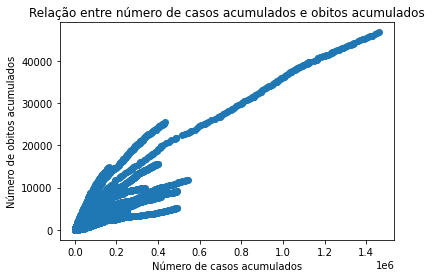

In [262]:
plt.scatter(RegioesBrasil2020.casosAcumulado, RegioesBrasil2020.obitosAcumulado)
plt.xlabel('Número de casos acumulados')
plt.ylabel('Número de obitos acumulados')
plt.title('Relação entre número de casos acumulados e obitos acumulados')
plt.show()

### Vamos olhar individualmente para o casos novos. Qual sua relação com obitos casos?

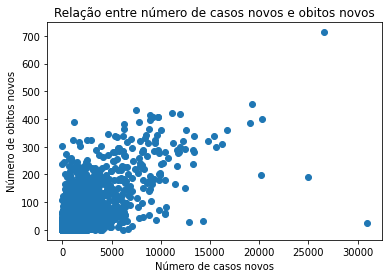

In [263]:
plt.scatter(RegioesBrasil2020.casosNovos, RegioesBrasil2020.obitosNovos)
plt.xlabel('Número de casos novos')
plt.ylabel('Número de obitos novos')
plt.title('Relação entre número de casos novos e obitos novos')
plt.show()

### Vamos olhar individualmente para o casos novos. Qual sua relação com obitos acumulados?

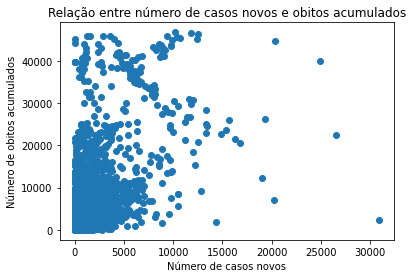

In [264]:
plt.scatter(RegioesBrasil2020.casosNovos, RegioesBrasil2020.obitosAcumulado)
plt.xlabel('Número de casos novos')
plt.ylabel('Número de obitos acumulados')
plt.title('Relação entre número de casos novos e obitos acumulados')
plt.show()

# Calculando a Correlação & Coeficiente de Pearson
Uma medida importante para saber se duas variáveis numéricas estão relacionadas é a Correlação de Pearson

In [266]:
# sns.jointplot(x='RM', y='PRICE', data=df, alpha = 0.1, stat_func=pearsonr)
"""
graph = sns.jointplot(data=RegioesBrasilFull, x='casosNovos', y='casosAcumulado', alpha=0.1)
r, p = stats.pearsonr(RegioesBrasilFull['casosNovos'], RegioesBrasilFull['casosAcumulado'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
"""

'\ngraph = sns.jointplot(data=RegioesBrasilFull, x=\'casosNovos\', y=\'casosAcumulado\', alpha=0.1)\nr, p = stats.pearsonr(RegioesBrasilFull[\'casosNovos\'], RegioesBrasilFull[\'casosAcumulado\'])\nphantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)\n\ngraph.ax_joint.legend([phantom],[\'r={:f}, p={:f}\'.format(r,p)])\n'

### Com base nos casos novos avaliar a quantidade de obitos novos em dado ano.